#### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
# import cufflinks
# cufflinks.go_offline()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

## Information about the dataset

**Age**: Age<br>
**Sex**: Sex (1 = male; 0 = female)<br>
**ChestPain**: Chest pain (typical, asymptotic, nonanginal, nontypical)<br>
**RestBP**: Resting blood pressure<br>
**Chol**: Serum cholestoral in mg/dl<br>
**Fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)<br>
**RestECG**: Resting electrocardiographic results<br>
**MaxHR**: Maximum heart rate achieved<br>
**ExAng**: Exercise induced angina (1 = yes; 0 = no)<br>
**Oldpeak**: ST depression induced by exercise relative to rest<br>
**Slope**: Slope of the peak exercise ST segment<br>
**Ca**: Number of major vessels colored by flourosopy (0 - 3)<br>
**Thal**: (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
**Target**: AHD - Diagnosis of heart disease (1 = yes; 0 = no)<br>

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

In [13]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


# Classification

#### Imports

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Standardize the Variables

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [487]:
sc.fit(X)
df_sc=pd.DataFrame(sc.transform(X),columns=df.columns[:-1])
df_sc['target']=df['target']

In [488]:
df_sc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


### Train Test Split

In [489]:
X=df_sc.drop('target',axis=1)
y=df_sc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [490]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((212, 13), (212,), (91, 13), (91,))

### Classification with Default Params

In [491]:
classifiers=[LogisticRegression(),
             KNeighborsClassifier(),
             SVC(kernel='rbf'),
             SVC(kernel='linear'),
             GaussianNB(),
             BernoulliNB(),
             GaussianProcessClassifier(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             QuadraticDiscriminantAnalysis()]

In [492]:

def predict(clf_list,score_list):
    for i in clf_list:
        i.fit(X_train,y_train)
        print('                ',i)
        print('Score =',i.score(X_test,y_test))
        print(confusion_matrix(y_test,i.predict(X_test)))
        print(classification_report(y_test,i.predict(X_test)))
        score_list.append(i.score(X_test,y_test))
        print('*'*80)
    return score_list

In [493]:
default_scores=[]
ds=predict(classifiers,default_scores)
ds

                 LogisticRegression()
Score = 0.7912087912087912
[[31  9]
 [10 41]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.82      0.80      0.81        51

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

********************************************************************************
                 KNeighborsClassifier()
Score = 0.7802197802197802
[[29 11]
 [ 9 42]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        40
           1       0.79      0.82      0.81        51

    accuracy                           0.78        91
   macro avg       0.78      0.77      0.78        91
weighted avg       0.78      0.78      0.78        91

********************************************************************************
              

[0.7912087912087912,
 0.7802197802197802,
 0.8131868131868132,
 0.8021978021978022,
 0.8021978021978022,
 0.8681318681318682,
 0.7362637362637363,
 0.7472527472527473,
 0.8021978021978022,
 0.7362637362637363,
 0.7692307692307693]

### Finding Alternate Params with GridSearch

In [494]:
classifiers=[LogisticRegression(),KNeighborsClassifier(),SVC(),SVC(),GaussianProcessClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
params=[{'penalty':('l1', 'l2', 'elasticnet', 'none'),'C':np.append(np.arange(0.01,1,0.03),[2,3,4,5]),'solver' :('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),'multi_class' : ('auto', 'ovr', 'multinomial')},
       {'n_neighbors':range(1,51),'weights' : ('uniform', 'distance'),'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),'metric':('minkowski','manhattan','chebyshev','euclidean')},
       {'kernel':('rbf','rbf'),'C':np.append(np.arange(0.01,1,0.03),[2,3,4,5]),'gamma' : ('scale', 'auto')},
       {'kernel':('linear','linear'),'C':np.append(np.arange(0.01,1,0.03),[2,3,4,5]),'gamma' : ('scale', 'auto')},
       {'max_iter_predict':np.arange(10,201),'multi_class':('one_vs_rest', 'one_vs_one')},
       {'criterion' : ('gini', 'entropy'),'max_depth':range(1,10),'splitter':('best','random'),'min_samples_split':np.arange(1,25)},
       {'criterion' : ('gini', 'entropy'),'max_depth':range(1,10),'n_estimators':[5,10,15,25,50,75,100,125,150]}]

In [495]:
alt_params=[]
for clf,param in zip(classifiers,params):
    grid=GridSearchCV(clf,param)
    grid.fit(X_train,y_train)
    print(clf,' = ',grid.best_params_) 
    alt_params.append(grid.best_params_)
    #it may take a while

LogisticRegression()  =  {'C': 0.19, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
KNeighborsClassifier()  =  {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
SVC()  =  {'C': 0.28, 'gamma': 'scale', 'kernel': 'rbf'}
SVC()  =  {'C': 4.0, 'gamma': 'scale', 'kernel': 'linear'}
GaussianProcessClassifier()  =  {'max_iter_predict': 10, 'multi_class': 'one_vs_rest'}
DecisionTreeClassifier()  =  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 8, 'splitter': 'random'}
RandomForestClassifier()  =  {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}


In [496]:
alt_params

[{'C': 0.19,
  'multi_class': 'multinomial',
  'penalty': 'l2',
  'solver': 'newton-cg'},
 {'algorithm': 'auto',
  'metric': 'minkowski',
  'n_neighbors': 9,
  'weights': 'uniform'},
 {'C': 0.28, 'gamma': 'scale', 'kernel': 'rbf'},
 {'C': 4.0, 'gamma': 'scale', 'kernel': 'linear'},
 {'max_iter_predict': 10, 'multi_class': 'one_vs_rest'},
 {'criterion': 'entropy',
  'max_depth': 6,
  'min_samples_split': 8,
  'splitter': 'random'},
 {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}]

### Classification with GridSearch Params

In [497]:
classifiers=[LogisticRegression(C= alt_params[0]['C'], multi_class= alt_params[0]['multi_class'], penalty= alt_params[0]['penalty'], solver= alt_params[0]['solver']),
             KNeighborsClassifier(algorithm= alt_params[1]['algorithm'], metric= alt_params[1]['metric'], n_neighbors= alt_params[1]['n_neighbors'], weights= alt_params[1]['weights']),
             SVC(C= alt_params[2]['C'], gamma= alt_params[2]['gamma'], kernel= alt_params[2]['kernel']),
             SVC(C= alt_params[3]['C'], gamma= alt_params[3]['gamma'], kernel= alt_params[3]['kernel']),
             GaussianNB(),
             BernoulliNB(),
             GaussianProcessClassifier(max_iter_predict=alt_params[4]['max_iter_predict'],multi_class=alt_params[4]['multi_class']),
             DecisionTreeClassifier(criterion= alt_params[5]['criterion'], max_depth= alt_params[5]['max_depth'],splitter=alt_params[5]['splitter'],min_samples_split=alt_params[5]['min_samples_split']),
             RandomForestClassifier(criterion= alt_params[6]['criterion'], max_depth= alt_params[6]['max_depth'], n_estimators= alt_params[6]['n_estimators']),
             AdaBoostClassifier(),
             QuadraticDiscriminantAnalysis()]

In [498]:
best_scores=[]
bs=predict(classifiers,best_scores)
bs

                 LogisticRegression(C=0.19, multi_class='multinomial', solver='newton-cg')
Score = 0.8131868131868132
[[31  9]
 [ 8 43]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        40
           1       0.83      0.84      0.83        51

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

********************************************************************************
                 KNeighborsClassifier(n_neighbors=9)
Score = 0.8021978021978022
[[28 12]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        40
           1       0.79      0.88      0.83        51

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

*****************************

[0.8131868131868132,
 0.8021978021978022,
 0.8241758241758241,
 0.8131868131868132,
 0.8021978021978022,
 0.8681318681318682,
 0.7362637362637363,
 0.7692307692307693,
 0.8571428571428571,
 0.7362637362637363,
 0.7692307692307693]

### KNN n_neighbors errors

In [499]:
error_rate=[]
for i in np.arange(50):
    i+=1
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_pred_i=knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred_i !=y_test))

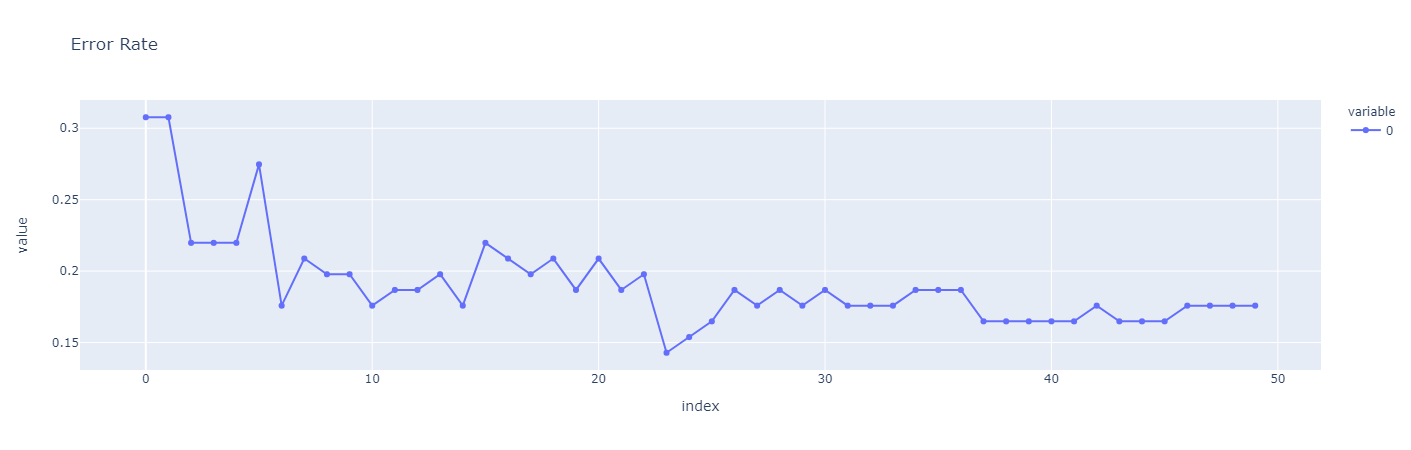

In [500]:
import plotly.express as px

fig = px.line(pd.DataFrame(error_rate),markers=True,title='Error Rate')

fig.show()

# Comparing Classifiers with Default and Alternate Params

In [501]:
classifiers=['LogisticRegression',
             'KNeighborsClassifier',
             'SVC(rbf)',
             'SVC(linear)',
             'GaussianNB',
             'BernoulliNB',
             'GaussianProcessClassifier',
             'DecisionTreeClassifier',
             'RandomForestClassifier',
             'AdaBoostClassifier',
             'QuadraticDiscriminantAnalysis']
df2=pd.DataFrame({'Default Params Score':ds,'Alternate Params Score':bs},index=classifiers)

##### **Note that the parameters coming from gridsearch is not always best. Sometimes they predict worse than default parameters.**
##### **It depends on method, data, random state etc.**

In [502]:
df2

,Default Params Score,Alternate Params Score
LogisticRegression,0.791209,0.813187
KNeighborsClassifier,0.780220,0.802198
SVC(rbf),0.813187,0.824176
SVC(linear),0.802198,0.813187
GaussianNB,0.802198,0.802198
BernoulliNB,0.868132,0.868132
GaussianProcessClassifier,0.736264,0.736264
DecisionTreeClassifier,0.747253,0.769231
RandomForestClassifier,0.802198,0.857143
AdaBoostClassifier,0.736264,0.736264


### Bar Plot of Classifiers Score

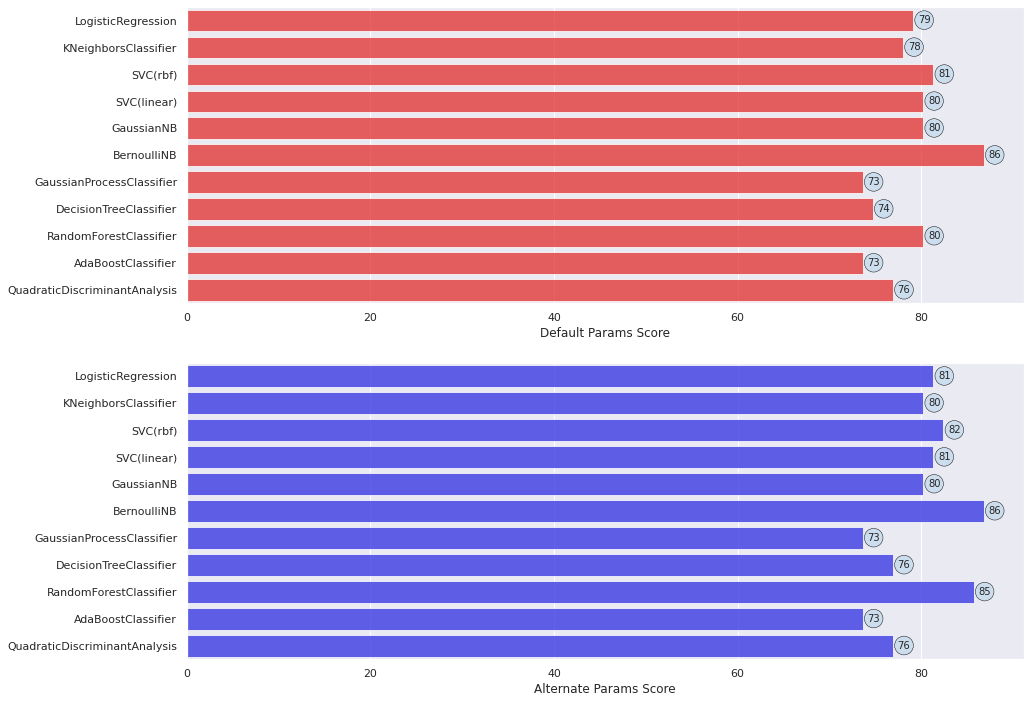

In [503]:

fig, axes = plt.subplots(ncols=1,nrows=2,figsize=(15,12))


sns.barplot(y=df2.index,x='Default Params Score',data=df2*100,color='#ff1010',alpha=.75,ax=axes[0])
sns.barplot(y=df2.index,x='Alternate Params Score',data=df2*100,color='#1010ff',alpha=.75,ax=axes[1]);
for i in range (len(axes)):
    for p in axes[i].patches:
        x = p.get_x() + p.get_width()+.5
        y = p.get_y() + p.get_height()-.3
        value = int(p.get_width())
        axes[i].text(x, y, value, ha="left",fontsize=10,bbox=dict(facecolor='#ccddee', edgecolor='black',boxstyle='circle', linewidth=0.45))

